# Universidad Torcuato DiTella

# Financial Analytics

## TP Final

## Docente

Prof. Pablo Roccatagliata    --  proccatagliata@gmail.com 

## Autores
- Daniela Bessone            -- dsbessone@gmail.com          -- MiM
- Dan Frydman                -- frydmandan@gmail.com         -- MiM
- Rodrigo Corvalan Slaguero  -- rodrigocorvalan93@gmail.com  -- MFin
- Agustin Alba Chicar        -- ag.albachicar@gmail.com      -- MiM

## Repositorio

https://github.com/agalbachicar/fa_momentum

## Contenido

- [Analisis exploratorio del dataset](http://localhost:8888/notebooks/src/momentum.ipynb#1.--Realizar-un-an%C3%A1lisis-exploratorio-del-dataset.)
- [Ingenieria de features](http://localhost:8888/notebooks/src/momentum.ipynb#2.--Ingenieria-de-features)
  - [¿Encuentra valores de los features que parecen errores en los datos?](http://localhost:8888/notebooks/src/momentum.ipynb#2.1---%C2%BFNecesita-corregir-valores-faltantes?)

In [52]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

In [53]:
# Constantes utiles.
DATA_FILE_PATH='mtum.csv'

In [54]:
def plot_mtum(df):
    '''
    Crea una figura con dos graficos en columna.
    El grafico de arriba imprime la evolucion del precio de cierre, maximo y minimo de forma diaria.
    El grafico de abajo imprime la evolucion del volumen operado en el dia.
    
    @param df Es el data frame de pandas de donde se extraen los valores.
              Espera que tenga cuatro series completas: 'Close','High', 'Low' y 'Date'.
       
    '''
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,10))
    
    df.plot(kind='line',y='Close', x='Date', color='blue', ax=axes[0])
    df.plot(kind='line',y='High', x='Date', color='green', ax=axes[0])
    df.plot(kind='line',y='Low', x='Date', color='red', ax=axes[0])
    df.plot(kind='line',y='Open', x='Date', color='orange', ax=axes[0])
    plt.title('MTUM prices')

    df.plot(kind='line',y='Volume', x='Date', color='blue', ax=axes[1])
    plt.title('MTUM volume')

    plt.show()


### 1.- Realizar un análisis exploratorio del dataset. 


In [55]:
# Cargamos el data frame. La información puede conseguirse en:
# https://finance.yahoo.com/quote/MTUM/history?p=MTUM
mtum_df = pd.read_csv(DATA_FILE_PATH)
mtum_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-04-18,50.919998,50.919998,50.919998,50.919998,46.707516,400
1,2013-04-19,50.919998,50.919998,50.919998,50.919998,46.707516,0
2,2013-04-22,50.919998,50.919998,50.919998,50.919998,46.707516,0
3,2013-04-23,52.220001,52.220001,52.220001,52.220001,47.899956,600
4,2013-04-24,51.700001,51.700001,51.560001,51.560001,47.294567,1100


In [56]:
mtum_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1696,2020-01-13,127.809998,128.750000,127.809998,128.750000,128.750000,483400
1697,2020-01-14,128.750000,128.759995,128.259995,128.500000,128.500000,658000
1698,2020-01-15,128.619995,129.869995,128.580002,129.589996,129.589996,648200
1699,2020-01-16,130.080002,130.649994,129.899994,130.619995,130.619995,480900
1700,2020-01-17,130.860001,131.429993,130.699997,131.380005,131.380005,641600


In [57]:
# Evaluamos los tipos de dato presentes en el dataset.
mtum_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [58]:
# Analizo si hay duplicados
duplicate_rows_df = mtum_df[mtum_df.duplicated()]
nrows, _ = duplicate_rows_df.shape
print('El dataframe posee {} duplicados.'.format(nrows))

El dataframe posee 0 duplicados.


In [59]:
# Analisis de valores nulos.
print(mtum_df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [60]:
# Descripcion por defecto del dataset provista por pandas.
mtum_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1701.000000,1701.000000,1701.000000,1701.000000,1701.000000,1.701000e+03
mean,84.316349,84.700094,83.843686,84.297155,81.107621,4.605891e+05
std,22.099439,22.221504,21.946565,22.094723,23.162624,6.649536e+05
min,50.070000,50.119999,49.709999,50.119999,45.973698,0.000000e+00
25%,67.800003,68.309998,67.300003,67.790001,63.558945,3.290000e+04
50%,76.260002,76.480003,75.949997,76.220001,72.951920,2.092000e+05
75%,107.150002,108.029999,106.209999,107.239998,105.039154,6.197000e+05
max,130.860001,131.429993,130.699997,131.380005,131.380005,6.123600e+06


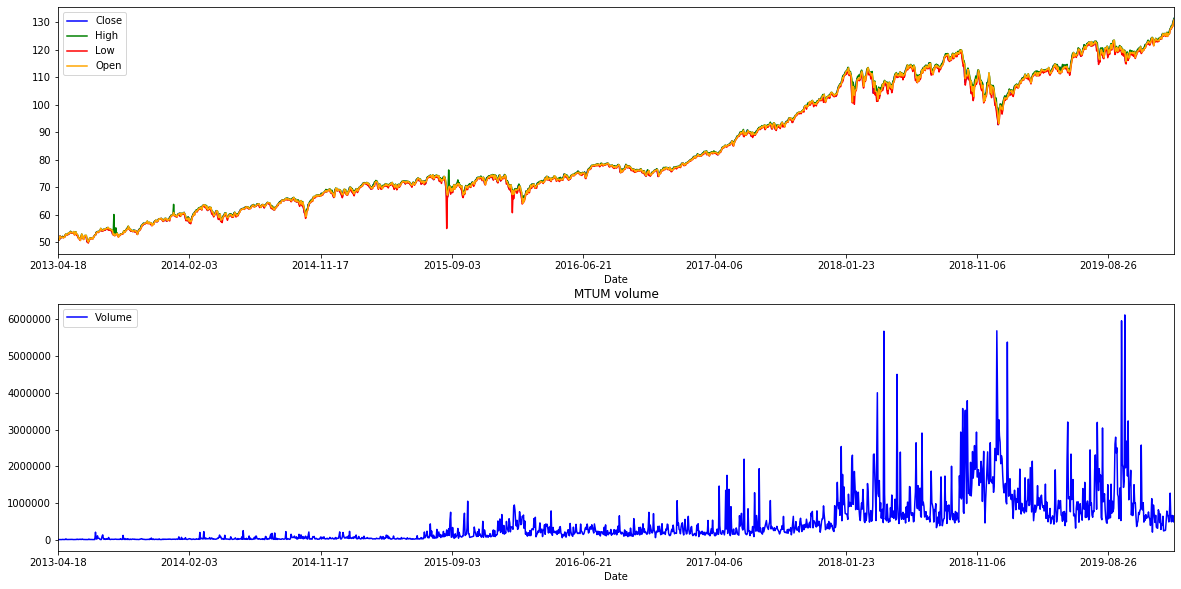

In [61]:
# Ploteamos el precio de cierre del ETF a lo largo de todo el tiempo.
plot_mtum(mtum_df)

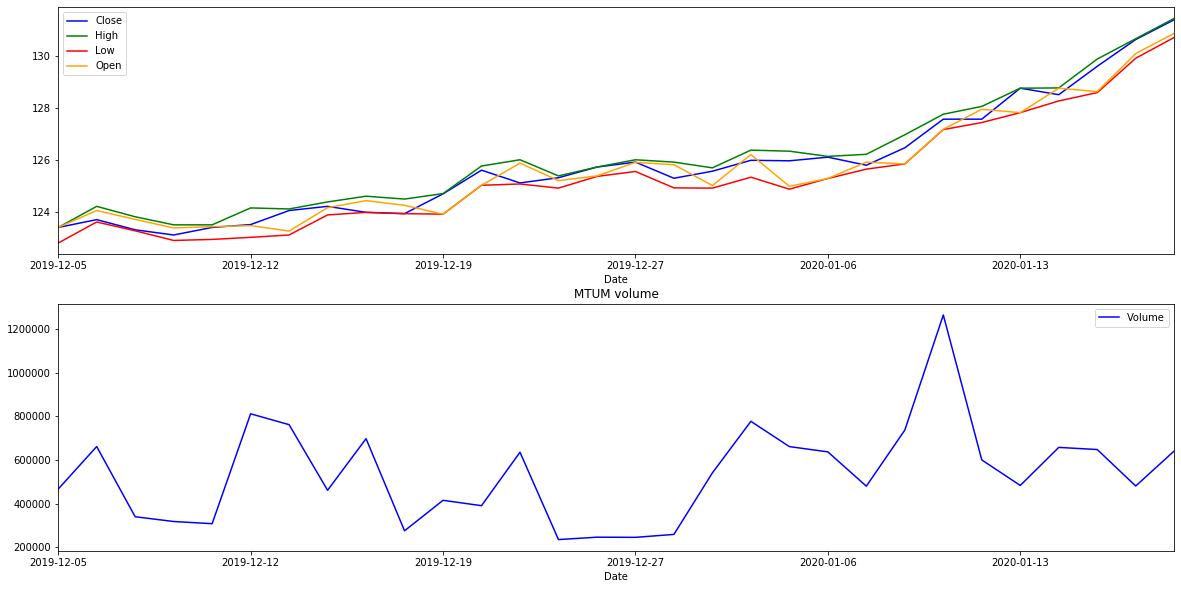

In [62]:
# Realizamos lo mismo pero para el ultimo mes.
plot_mtum(mtum_df.tail(30))

**Conclusiones**

El dataset mtum es un dataset de serie temporal diaria que contiene los precios de apertura, cierre, maximo y minimo además del volumen operado de iShares Edge MSCI USA Momentum Factor ETF (ver https://www.blackrock.com/cl/productos/251614/ishares-msci-usa-momentum-factor-etf).

El dataset no posee NA / missing data y contine aproximadamente 1700 registros, que son el resultado del registro diario desde el 18 de abril de 2013 al 13 de enero de 2020 (con la excepcion de los dias en que el ETF no opero - feriados, fines de semana, etc.).

### 2.- Ingenieria de features

#### 2.1 - ¿Necesita corregir valores faltantes?

In [63]:
# Detalle de las fechas faltantes
dates_df = mtum_df[['Date']].copy()
dates_df.Date = pd.to_datetime(dates_df['Date'], infer_datetime_format=True)
dates_df['DayOfWeek'] = dates_df.Date.dt.dayofweek
# Evaluamos si hay sabados y domingos
dates_df.loc[dates_df['DayOfWeek'].isin([5, 6])].shape

(0, 2)

In [64]:
# Buscamos el 4 de julio (feriados en USA). Para ejemplificar, el 4/7/2019 fue jueves.
dates_df.loc[dates_df['Date'] == datetime.date(year=2019, month=7, day=4)].shape

/home/agustin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  


(0, 2)

**Conclusion**

Los dias que estan, estan porque son los que el ETF opero. No se requiere corregir errores por valores faltantes.